# ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Helpful function for visualizing and finally cleaning data

In [2]:
def plot_corr_heatmap(df):
    corr = df.corr()
#     plt.rcParams['figure.figsize'] = 10,8
    fig = plt.figure()
    sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap="viridis")
    plt.show()

def plot_corr_heatmap_upper(df):
    corr = df.corr()
    # Select upper triangle of correlation matrix
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
#     plt.rcParams['figure.figsize'] = 10,8
    fig = plt.figure()
    sns.heatmap(upper, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap="viridis")
    plt.show()  
    s = abs(corr.unstack())
    so = s.sort_values(kind="quicksort", ascending=False)
    print(so.head(500))

In [3]:
def filter_highcorr_features(df, corr_limit):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > corr_limit)]
    df = df.drop(to_drop, axis=1)
    return df

## Importing finalized data after preprocessing and feature engineering

In [4]:
## Michael 
object_labels_survey_final = pd.read_pickle('data/FINAL/object_labels_final.pkl')
# object_labels_survey_final = filter_highcorr_features(object_labels_survey_final, 0.7)
# plot_corr_heatmap_upper(object_labels_survey_final)
# object_labels_survey_final.corr()
# plot_corr_heatmap_upper(object_labels_survey_final)

In [5]:
## Ben
image_metrics_final = pd.read_pickle('data/FINAL/image_metrics_final.pkl')
image_metrics_final.columns = ['like_count', 'comment_count']
image_metrics_final =  image_metrics_final.reset_index()
image_metrics_final['user_id'] = image_metrics_final['user_id'].astype(int)
# object_labels_survey_final = filter_highcorr_features(object_labels_survey_final, 0.7)

In [6]:
## Lino
face_df_final = pd.read_pickle('data/FINAL/face_df_final.pkl')
face_df_final.head()

,user_id,n_images,face_sunglasses_perc,face_beard_perc,face_smile_perc,eyeglasses_perc,face_gender_Female_perc,face_gender_Male_perc,face_emo_ANGRY_perc,face_emo_CALM_perc,face_emo_DISGUSTED_perc,face_emo_HAPPY_perc,face_emo_SAD_perc,face_emo_SURPRISED_perc,face_age_mean
0,1619510,429,0.102564,0.104895,0.827506,0.552448,0.333333,0.666667,0.018648,0.004662,0.004662,0.857809,0.053613,0.044289,32.102564
1,2829661,39,0.102564,0.102564,0.769231,0.205128,0.717949,0.282051,0.025641,0.025641,0.000000,0.846154,0.076923,0.025641,33.051282
2,3069744,166,0.054217,0.349398,0.710843,0.192771,0.512048,0.487952,0.024096,0.066265,0.006024,0.704819,0.102410,0.066265,30.807229
3,3988856,122,0.155738,0.221311,0.737705,0.229508,0.483607,0.516393,0.024590,0.016393,0.016393,0.729508,0.057377,0.131148,32.213115
4,4185084,8,0.000000,0.625000,0.625000,0.750000,0.000000,1.000000,0.125000,0.250000,0.125000,0.250000,0.125000,0.000000,34.625000


In [7]:
## Dimitris
image_data_final = pd.read_pickle('data/FINAL/image_data_final.pkl')
anp_final = pd.read_pickle('data/FINAL/anp_final.pkl')
survey_final = pd.read_pickle('data/FINAL/survey_final.pkl')

In [8]:
# counts = image_data_final.user_posted_photos.value_counts()
# counts.hist()
# plt.show()

## Merge

In [9]:
#merge anp and image_data
image_data_final = image_data_final.groupby('user_id').agg(np.mean).reset_index()
imagedata_anp_final = pd.merge(image_data_final, anp_final, how='left', on='user_id')

#merge face
imagedata_anp_face_final = pd.merge(imagedata_anp_final, face_df_final, how='left', on='user_id')

#merge image_metrics
imagedata_anp_face_metrics_final = pd.merge(imagedata_anp_face_final, image_metrics_final, how='left', on='user_id')

# merge object labels
final_df = pd.merge(imagedata_anp_face_metrics_final, object_labels_survey_final, how='left', on='user_id')

#add dependent variable
final_df = pd.merge(final_df, survey_final[['user_id','PERMA']],on='user_id', how='left')

#change NaN to mean values
final_df = final_df.fillna(final_df.mean())
new_final_df = final_df
#filter highly correlated features
final_df = filter_highcorr_features(final_df, 0.35)

In [10]:
new_final_df.shape

(159, 99)

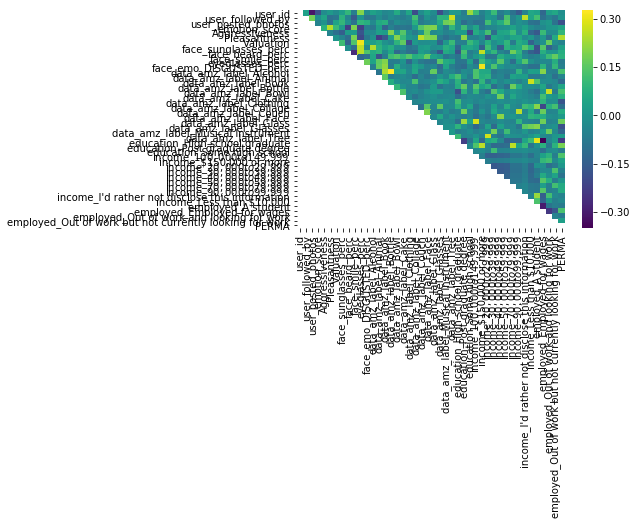

PERMA                                                    PERMA                                                      1.000000
income_$20,000 to $29,999                                income_$20,000 to $29,999                                  1.000000
data_amz_label_Glasses                                   data_amz_label_Glasses                                     1.000000
data_amz_label_Musical Instrument                        data_amz_label_Musical Instrument                          1.000000
data_amz_label_Tree                                      data_amz_label_Tree                                        1.000000
education_High school graduate                           education_High school graduate                             1.000000
education_Post graduate degree                           education_Post graduate degree                             1.000000
education_Some high school                               education_Some high school                                 1.000000


In [11]:
plot_corr_heatmap_upper(final_df)

In [12]:
from sklearn.model_selection import train_test_split

features_All = final_df.drop('PERMA', axis =1)

X = features_All.drop('user_id', axis = 1)
y = final_df['PERMA']

X_train, X_test,  y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
import math

In [14]:
# from sklearn.feature_selection import RFECV

# selector = RFECV(LinearRegression(), step=1, cv=5)
# selector_model = selector.fit(X_train, y_train)
# selector.get_support()

In [15]:
# print("Optimal number of features : %d" % selector_model.n_features_)

# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
# plt.show()

In [16]:
from sklearn.feature_selection import SelectKBest
import statsmodels.api as sm
from scipy import stats

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
results_dict = {}
features_appearances = []
for i in range(17,18):
    for k in range(1,50):
        X_new = SelectKBest(mutual_info_regression, k=i).fit(X, y)
#         X_new.shape
#         X_new
        
        # Create and fit selector
        # Get idxs of columns to keep
        idxs_selected = X_new.get_support(indices=True)
        # Create new dataframe with only desired columns, or overwrite existing
        features_dataframe_new = X.iloc[:, idxs_selected]
        features_appearances.extend(list(features_dataframe_new))

        X_train, X_test,  y_train, y_test = train_test_split(features_dataframe_new, y, test_size=0.2, random_state = 42)

        lm = LinearRegression()
        crossval_score = cross_val_score(lm, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_error')
        lm.fit(X_train, y_train)

        X2 = sm.add_constant(X_train)
        est = sm.OLS(y_train, X2)
        est2 = est.fit()
    #     print(est2.summary())
        adj_r_sq = est2.rsquared_adj

        #Make prediction
        y_pred = lm.predict(X_test)
    #     #The intercept
    #     print('Intercept: \n', lm.intercept_)
    #     #The coefficients
    #     print('Coefficients: \n', lm.coef_)
    #     #     The mean squared error
    #     print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    #     #     The root mean squared error
    #     print("Root mean squared error: %.2f"% math.sqrt(mean_squared_error(y_test, y_pred)))
    #     #     Explained variance score: 1 is perfect prediction
    #     print('R squared: %.2f' % r2_score(y_test, y_pred))
        # results_dict = {
        #                 'MSE': mean_squared_error(y_test, y_pred),
        #                'R_sq': r2_score(y_test, y_pred),
        #                 'cross_val': [crossval_score.mean(), crossval_score.std()]}
        results_dict[str(i)+"_"+str(k)] = [math.sqrt(mean_squared_error(y_test, y_pred)), math.sqrt(mean_absolute_error(y_test, y_pred)), 
                                adj_r_sq, math.sqrt(abs(crossval_score.mean())),  crossval_score.std()]
results_df = pd.DataFrame.from_dict(results_dict, orient = "index")
results_df.columns = ['Prediction RMSE', 'Prediction MAE','Adj R_sq', 'CrossVal MAE', 'CrossVal std']
features_appearances

['user_followed_by',
 'Aggressiveness',
 'Pleasantness',
 'Valuation',
 'face_sunglasses_perc',
 'face_smile_perc',
 'face_emo_DISGUSTED_perc',
 'data_amz_label_Couch',
 'education_High school graduate',
 'education_Post graduate degree',
 'income_$150,000 or more',
 'income_$40,000 to $49,999',
 'income_$90,000 to $99,999',
 'employed_A student',
 'employed_Employed for wages',
 'employed_Out of work and looking for work',
 'employed_Out of work but not currently looking for work',
 'user_followed_by',
 'user_posted_photos',
 'Aggressiveness',
 'Pleasantness',
 'Valuation',
 'face_sunglasses_perc',
 'face_smile_perc',
 'face_emo_DISGUSTED_perc',
 'data_amz_label_Bottle',
 'data_amz_label_Clothing',
 'data_amz_label_Couch',
 'education_High school graduate',
 'education_Some high school',
 'income_$90,000 to $99,999',
 'employed_Employed for wages',
 'employed_Out of work and looking for work',
 'employed_Out of work but not currently looking for work',
 'user_followed_by',
 'Aggressiv

In [18]:
from collections import Counter
x = Counter(features_appearances)
df = pd.DataFrame.from_dict(x, orient='index').reset_index()
df.columns = ['feature', 'count']
df = df.sort_values(by = 'count', ascending = False)
df

,feature,count
0,user_followed_by,49
2,Pleasantness,49
3,Valuation,49
7,data_amz_label_Couch,49
1,Aggressiveness,49
4,face_sunglasses_perc,47
6,face_emo_DISGUSTED_perc,46
12,"income_$90,000 to $99,999",42
16,employed_Out of work but not currently looking...,42
8,education_High school graduate,41


In [19]:
new_features = df[:20]['feature']
new_features

0                                      user_followed_by
2                                          Pleasantness
3                                             Valuation
7                                  data_amz_label_Couch
1                                        Aggressiveness
4                                  face_sunglasses_perc
6                               face_emo_DISGUSTED_perc
12                            income_$90,000 to $99,999
16    employed_Out of work but not currently looking...
8                        education_High school graduate
14                          employed_Employed for wages
18                                data_amz_label_Bottle
15            employed_Out of work and looking for work
13                                   employed_A student
5                                       face_smile_perc
19                              data_amz_label_Clothing
9                        education_Post graduate degree
17                                   user_posted

In [20]:
results_dict = {}
for i in range(1,50):
    new_features = df[:i]['feature']
    final_features = X.loc[:,new_features]
    X_train, X_test,  y_train, y_test = train_test_split(final_features, y, test_size=0.2, random_state = 42)
    lm = LinearRegression()
    crossval_score = cross_val_score(lm, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_error')
    lm.fit(X_train, y_train)

    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())
    adj_r_sq = est2.rsquared_adj

    #Make prediction
    y_pred = lm.predict(X_test)
    #     #The intercept
    #     print('Intercept: \n', lm.intercept_)
    #     #The coefficients
    #     print('Coefficients: \n', lm.coef_)
    #     #     The mean squared error
    #     print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    #     #     The root mean squared error
    #     print("Root mean squared error: %.2f"% math.sqrt(mean_squared_error(y_test, y_pred)))
    #     #     Explained variance score: 1 is perfect prediction
    #     print('R squared: %.2f' % r2_score(y_test, y_pred))
    # results_dict = {
    #                 'MSE': mean_squared_error(y_test, y_pred),
    #                'R_sq': r2_score(y_test, y_pred),
    #                 'cross_val': [crossval_score.mean(), crossval_score.std()]}
    results_dict[str(i)+"_"+str(k)] = [math.sqrt(mean_squared_error(y_test, y_pred)), math.sqrt(mean_absolute_error(y_test, y_pred)), 
                            adj_r_sq, math.sqrt(abs(crossval_score.mean())),  crossval_score.std().copy()]
results_df = pd.DataFrame.from_dict(results_dict, orient = "index")
results_df.columns = ['Prediction RMSE', 'Prediction MAE','Adj R_sq', 'CrossVal MAE', 'CrossVal std']
results_df

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1975
Date:                Sun, 28 Oct 2018   Prob (F-statistic):              0.658
Time:                        19:05:06   Log-Likelihood:                -225.37
No. Observations:                 127   AIC:                             454.7
Df Residuals:                     125   BIC:                             460.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9753      0.150  

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     1.896
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0524
Time:                        19:05:06   Log-Likelihood:                -215.86
No. Observations:                 127   AIC:                             453.7
Df Residuals:                     116   BIC:                             485.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1.867
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0263
Time:                        19:05:06   Log-Likelihood:                -208.27
No. Observations:                 127   AIC:                             454.5
Df Residuals:                     108   BIC:                             508.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1.638
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0434
Time:                        19:05:07   Log-Likelihood:                -202.94
No. Observations:                 127   AIC:                             459.9
Df Residuals:                     100   BIC:                             536.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1.649
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0356
Time:                        19:05:07   Log-Likelihood:                -199.08
No. Observations:                 127   AIC:                             460.2
Df Residuals:                      96   BIC:                             548.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1.649
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0356
Time:                        19:05:07   Log-Likelihood:                -199.08
No. Observations:                 127   AIC:                             460.2
Df Residuals:                      96   BIC:                             548.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  PERMA   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1.649
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0356
Time:                        19:05:07   Log-Likelihood:                -199.08
No. Observations:                 127   AIC:                             460.2
Df Residuals:                      96   BIC:                             548.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

,Prediction RMSE,Prediction MAE,Adj R_sq,CrossVal MAE,CrossVal std
1_49,1.299036,0.998296,-0.006410,1.066624,0.061396
2_49,1.259746,0.984946,0.046546,1.055376,0.044191
3_49,1.256364,0.981147,0.040360,1.056712,0.053214
4_49,1.298502,0.990134,0.038121,1.056948,0.049597
5_49,1.321368,1.020189,0.051127,1.074988,0.039273
6_49,1.319580,1.018915,0.047558,1.072086,0.039404
7_49,1.330086,1.023758,0.040193,1.072272,0.038525
8_49,1.338992,1.021605,0.038052,1.073886,0.039490
9_49,1.340553,1.026961,0.030859,1.085761,0.010872
10_49,1.298285,0.977010,0.066400,1.081511,0.055920


In [21]:
new_features = df[:19]['feature']
FINAL_FEATURES = X.loc[:, new_features]
FINAL_FEATURES

,user_followed_by,Pleasantness,Valuation,data_amz_label_Couch,Aggressiveness,face_sunglasses_perc,face_emo_DISGUSTED_perc,"income_$90,000 to $99,999",employed_Out of work but not currently looking for work,education_High school graduate,employed_Employed for wages,data_amz_label_Bottle,employed_Out of work and looking for work,employed_A student,face_smile_perc,data_amz_label_Clothing,education_Post graduate degree,user_posted_photos,"income_$100,000 to $149,999"
0,364.0,0.497145,0.586735,0.010561,0.387173,0.102564,0.004662,0.000000,0.000000,1.000000,0.000000,0.001980,0.000000,0.0,0.827506,0.003960,0.00,2037.0,0.000000
1,198.0,0.385417,0.571429,0.000000,0.800000,0.102564,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.769231,0.000000,0.00,124.0,0.000000
2,311.0,0.302926,0.525000,0.014286,0.117188,0.054217,0.006024,0.000000,0.000000,1.000000,0.000000,0.002857,1.000000,0.0,0.710843,0.005714,0.00,350.0,1.000000
3,732.0,0.382543,0.194805,0.001642,0.936441,0.155738,0.016393,0.000000,0.000000,1.000000,0.000000,0.003284,0.000000,0.0,0.737705,0.001642,0.00,610.0,1.000000
4,24.0,-0.454545,1.142857,0.046875,-0.368421,0.000000,0.125000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.625000,0.000000,0.00,64.0,0.000000
5,1047.0,0.566009,0.901961,0.008621,0.682927,0.144105,0.000000,0.000000,0.000000,0.000000,1.000000,0.010776,0.000000,0.0,0.864629,0.004310,0.00,465.0,0.000000
6,146.0,0.404871,1.500000,0.007576,0.215686,0.104895,0.006993,1.000000,0.000000,0.000000,0.000000,0.012626,0.000000,0.0,0.741259,0.002525,0.00,406.0,0.000000
7,177.0,0.088608,0.537313,0.006723,0.815331,0.040816,0.010204,0.000000,0.000000,1.000000,1.000000,0.005042,0.000000,0.0,0.612245,0.001681,0.00,599.0,0.000000
8,3.0,1.444444,0.627355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.666667,0.000000,0.00,5.0,0.000000
9,201.0,0.253359,0.840000,0.019231,0.717557,0.105263,0.000000,1.000000,0.000000,1.000000,0.000000,0.012821,0.000000,0.0,0.754386,0.000000,0.00,312.0,0.000000


In [22]:
def run_linear_regr(X_data, y_data):
    results_dict = {}
    X_train, X_test,  y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state = 42)
    lm = LinearRegression()
    crossval_score = cross_val_score(lm, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_error')
    lm.fit(X_train, y_train)

    X2 = sm.add_constant(X_train)
    est = sm.OLS(list(y_train), X2)
    est2 = est.fit()
    print(est2.summary())
    adj_r_sq = est2.rsquared_adj

    #Make prediction
    y_pred = lm.predict(X_test)
    #     #The intercept
    #     print('Intercept: \n', lm.intercept_)
    #     #The coefficients
    #     print('Coefficients: \n', lm.coef_)
    #     #     The mean squared error
    #     print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
    #     #     The root mean squared error
    #     print("Root mean squared error: %.2f"% math.sqrt(mean_squared_error(y_test, y_pred)))
    #     #     Explained variance score: 1 is perfect prediction
    #     print('R squared: %.2f' % r2_score(y_test, y_pred))
    # results_dict = {
    #                 'MSE': mean_squared_error(y_test, y_pred),
    #                'R_sq': r2_score(y_test, y_pred),
    #                 'cross_val': [crossval_score.mean(), crossval_score.std()]}
#     print(crossval_score)
    results_dict[str(i)+"_"+str(k)] = [math.sqrt(mean_squared_error(y_test, y_pred)), math.sqrt(mean_absolute_error(y_test, y_pred)), 
                            adj_r_sq, math.sqrt(abs(crossval_score.mean())),  crossval_score.std().copy()]
    results_df = pd.DataFrame.from_dict(results_dict, orient = "index")
    results_df.columns = ['Prediction RMSE', 'Prediction MAE','Adj R_sq', 'CrossVal MAE', 'CrossVal sd']
    return results_df

In [23]:
results_df = run_linear_regr(FINAL_FEATURES, final_df['PERMA'])
results_df

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.997
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0142
Time:                        19:05:08   Log-Likelihood:                -206.20
No. Observations:                 127   AIC:                             452.4
Df Residuals:                     107   BIC:                             509.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

,Prediction RMSE,Prediction MAE,Adj R_sq,CrossVal MAE,CrossVal sd
49_49,1.452093,1.076745,0.130668,1.136415,0.276861


In [30]:
from sklearn.svm import SVR
import math

svr_rbf = SVR(kernel='rbf', C = 1000, gamma = "auto")
print('rbf')
model = svr_rbf.fit(X_train, y_train)
crossval_score = cross_val_score(model, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_error')

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print("Root mean squared error: %.2f"% math.sqrt(mean_squared_error(y_train, y_pred_train)))
print("abs: %.2f"% mean_absolute_error(y_test, y_pred_test))
print("Cross val MAE: %.2f"% crossval_score.mean())

rbf
Root mean squared error: 0.10
abs: 1.03
Cross val MAE: -1.15


In [31]:
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from joblib import Parallel, delayed

# Defining the function that you will run later
def calculate_vif_(X, thresh=5.0):
    variables = [X.columns[i] for i in range(X.shape[1])]
    dropped=True
    while dropped:
        dropped=False
        print(len(variables))
        vif = Parallel(n_jobs=-1,verbose=5)(delayed(variance_inflation_factor)(X[variables].values, ix) for ix in range(len(variables)))

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(time.ctime() + ' dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            variables.pop(maxloc)
            dropped=True

    print('Remaining variables:')
    print([variables])
    return X[[i for i in variables]]


X2 = calculate_vif_(FINAL_FEATURES,5)

results_df = run_linear_regr(X2, final_df['PERMA'])
results_df

19
Sun Oct 28 19:07:18 2018 dropping 'face_smile_perc' at index: 14
18
Remaining variables:
[['user_followed_by', 'Pleasantness', 'Valuation', 'data_amz_label_Couch', 'Aggressiveness', 'face_sunglasses_perc', 'face_emo_DISGUSTED_perc', 'income_$90,000 to $99,999', 'employed_Out of work but not currently looking for work', 'education_High school graduate', 'employed_Employed for wages', 'data_amz_label_Bottle', 'employed_Out of work and looking for work', 'employed_A student', 'data_amz_label_Clothing', 'education_Post graduate degree', 'user_posted_photos', 'income_$100,000 to $149,999']]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.032
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0136
Time:    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of  19 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  19 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.0s finished


,Prediction RMSE,Prediction MAE,Adj R_sq,CrossVal MAE,CrossVal sd
49_49,1.417899,1.060231,0.128461,1.141878,0.315404


## Final Analysis

In [79]:
results_dict = {}
results_df = pd.DataFrame
X_train, X_test,  y_train, y_test = train_test_split(X2, final_df['PERMA'], test_size=0.2, random_state = 42)
lm = LinearRegression()
crossval_score = cross_val_score(lm, X_train, y_train, cv=5, scoring = 'neg_mean_absolute_error')
lm.fit(X_train, y_train)

X_new = sm.add_constant(X_train)
est = sm.OLS(list(y_train), X_new)
est2 = est.fit()
# print(est2.summary())
adj_r_sq = est2.rsquared_adj
rsq = est2.rsquared
#Make prediction
y_pred = lm.predict(X_test)
results_dict[str(i)+"_"+str(k)] = [math.sqrt(mean_squared_error(y_test, y_pred)), math.sqrt(mean_absolute_error(y_test, y_pred)), 
                        rsq, adj_r_sq, math.sqrt(abs(crossval_score.mean()))]
results_df = pd.DataFrame.from_dict(results_dict, orient = "index")
results_df.columns = ['Prediction RMSE', 'Prediction MAE', 'Rsq', 'Adj R_sq', 'CrossVal MAE']


In [80]:
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     2.032
Date:                Sun, 28 Oct 2018   Prob (F-statistic):             0.0136
Time:                        20:13:20   Log-Likelihood:                -206.95
No. Observations:                 127   AIC:                             451.9
Df Residuals:                     108   BIC:                             505.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                       7.0943      0.418     16.957      0.000       6.265       7.924
user_followed_by                                          3.28e-05      0.000      0.157      0.876      -0.000       0.000
Pleasantness                                                0.5887      0.284      2.074      0.040       0.026       1.151
Valuation                                                  -0.1933      0.198     -0.974      0.332      -0.587       0.200
data_amz_label_Couch                                       -3.8998      2.926     -1.333      0.185      -9.699       1.900
Aggressiveness                                              0.1780      0.141      1.265      0.209      -0.101       0.457
face_sunglasses_perc                                        0.0693      1.509      0.046      0.963      -2.923       3.061
face_emo_DISGUSTED_perc                                    -0.6829      8.673     -0.079      0.937     -17.875      16.509
income_$90,000 to $99,999                                   0.5016      0.628      0.799      0.426      -0.742       1.746
employed_Out of work but not currently looking for work    -0.0505      0.729     -0.069      0.945      -1.496       1.395
education_High school graduate                             -0.4971      0.304     -1.638      0.104      -1.099       0.104
employed_Employed for wages                                 0.0263      0.297      0.088      0.930      -0.563       0.616
data_amz_label_Bottle                                      -4.7185      6.415     -0.736      0.464     -17.434       7.997
employed_Out of work and looking for work                  -0.8721      0.605     -1.443      0.152      -2.070       0.326
employed_A student                                         -0.3325      0.505     -0.659      0.511      -1.333       0.668
data_amz_label_Clothing                                    -3.1284      1.417     -2.208      0.029      -5.936      -0.320
education_Post graduate degree                              0.4635      0.502      0.924      0.358      -0.531       1.458
user_posted_photos                                         -0.0006      0.000     -1.934      0.056      -0.001    1.47e-05
income_$100,000 to $149,999                                 0.7580      0.417      1.816      0.072      -0.069       1.585
==============================================================================
Omnibus:                        3.059   Durbin-Watson:                   2.320
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                2.893
Skew:                          -0.369   Prob(JB):                        0.235
Kurtosis:                       2.958  

In [85]:
face_df_final.head()

,user_id,n_images,face_sunglasses_perc,face_beard_perc,face_smile_perc,eyeglasses_perc,face_gender_Female_perc,face_gender_Male_perc,face_emo_ANGRY_perc,face_emo_CALM_perc,face_emo_DISGUSTED_perc,face_emo_HAPPY_perc,face_emo_SAD_perc,face_emo_SURPRISED_perc,face_age_mean
0,1619510,429,0.102564,0.104895,0.827506,0.552448,0.333333,0.666667,0.018648,0.004662,0.004662,0.857809,0.053613,0.044289,32.102564
1,2829661,39,0.102564,0.102564,0.769231,0.205128,0.717949,0.282051,0.025641,0.025641,0.000000,0.846154,0.076923,0.025641,33.051282
2,3069744,166,0.054217,0.349398,0.710843,0.192771,0.512048,0.487952,0.024096,0.066265,0.006024,0.704819,0.102410,0.066265,30.807229
3,3988856,122,0.155738,0.221311,0.737705,0.229508,0.483607,0.516393,0.024590,0.016393,0.016393,0.729508,0.057377,0.131148,32.213115
4,4185084,8,0.000000,0.625000,0.625000,0.750000,0.000000,1.000000,0.125000,0.250000,0.125000,0.250000,0.125000,0.000000,34.625000
